$\textbf{GOAL}$ Continuation of ``l_qut_1`` staying on **linear model** but with a non convex penalty, **$P_\nu$**.

Under sparse hypothesis, we want minimize with $\ell_0$ *(not a norm !)* penalty (the cardinal of the support) but it's discrete optimization and it's very hard. So on the first notebook, we see a relaxation $\ell_1$ with good property (convexity, sparsity, $\dots$). Nonetheless, it has some limits and we better results, so we choose a penalty, $P_\nu$, ""closer"" to $\ell_0$.

# Theory

## Penalty $Rational_\nu$

We consider a class of functions, named by *me* $Rational_\nu$ $\{P_\nu\}_{\nu \in ]0,1[}$ QUT-compatible to the loss function used (SR-LASSO in this notebook).  

We will show later the proof of this compatibility, i.e. $\lambda_0^{local}$ associated is not constant for a design matrix $X$ and random vector $Y$.

For $\nu \in ]0,1]$,

$$P_\nu : \theta \in \mathbb{R}^p \mapsto \sum_{i=1}^p \rho_\nu(\theta_i) \quad \text{with} \quad \rho_\nu : x \in \mathbb{R} \mapsto \frac{|x|}{1+|x|^{1-\nu}} $$

$Rational_\nu$ is continuous, differentiable except in 0, non-convex, locally lipschitz. Moreover, $\rho_\nu$ is even and ``for $ν=0$ it tends to the $ℓ_0$ discrete penalty for |θ| large``.

Then, with $\nu=1$, we get $\ell_1$ penalty as already done in ``l_qut_1`` notebook

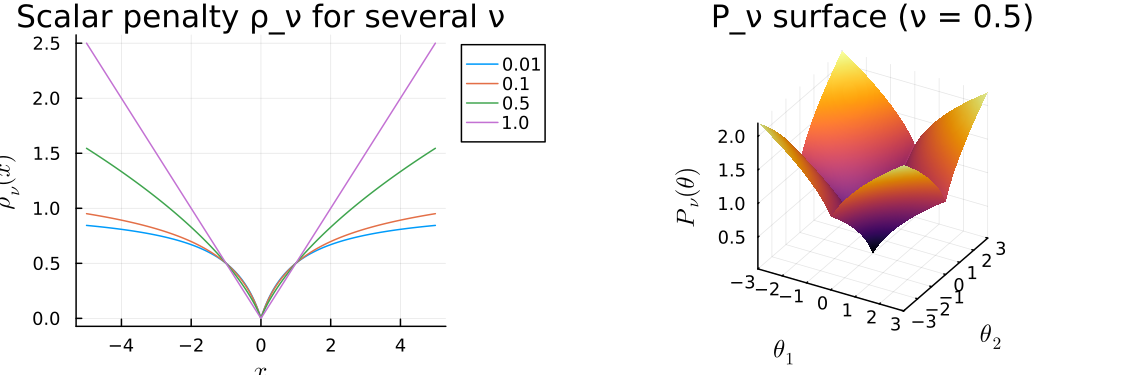

In [64]:
using Plots, LaTeXStrings
gr()

rho(ν, x) = abs(x) / (1 + abs(x)^(1 - ν))
Pν(ν, θ1, θ2) = rho(ν, θ1) + rho(ν, θ2)

xs  = range(-5, 5; length = 1000)
νs  = [0.01, 0.1, 0.5, 1.0]

plt2d = plot(; xlabel = L"x",ylabel = L"\rho_\nu(x)",title  = "Scalar penalty ρ_ν for several ν",legend = :outertopright, neatlegendtitle = L"\nu",legendfontsize = 8,dpi = 150)

for ν in νs
    plot!(plt2d, xs, x -> rho(ν, x), label = "$ν")
end

grid = range(-3, 3; length = 200)
ν     = 0.5
Z     = [Pν(ν, θ1, θ2) for θ2 in grid, θ1 in grid]

plt3d = surface(grid, grid, Z;xlabel = L"\theta_1",ylabel = L"\theta_2",zlabel = L"P_\nu(\theta)",title  = "P_ν surface (ν = $ν)",camera = (30, 30),legend = false)

plot(plt2d, plt3d; layout = (1, 2), size = (750, 250))


## Proximal

We will optimize $f+\lambda g$, with $f=RMSE$ and $g=P_\nu$ and even it's not a convex problem we use ISTA. We discuss about this later and we accept for the moment this choice.

In experiment we will take $\nu$ close to 0 and we need to get the proximal for $\nu \in ]0,1[$ because our penalty change from ``l_qut_1`` with an explicit expression ($\nu = 1$) called *soft thresholding*.

Remember we have, for $\gamma>0, \lambda>0$
$$
\emph{prox}_{\gamma, \lambda P_\nu} : z\in \mathbb{R}^p \mapsto \arg\min_{x\in\mathbb R^{p}}\;\Bigl\{\,\lambda P_\nu(x)+\tfrac1{2\gamma}\|x-z\|_2^2\Bigr\}
$$

By separability of the function inside the $\argmin$ and for $z\in \mathbb{R^p}$, $i\in \llbracket 1,p\rrbracket$

$$[\emph{prox}_{\gamma, \lambda P_\nu}(z)]_i = \arg\min_{x\in\mathbb R}\;
\underbrace{\Bigl\{\,\lambda \rho_\nu(x)+\tfrac1{2\gamma}(x-z)^2\Bigr\}}_{m(x;z)} $$

We need to compute this prox which is a real analysis problem and we explain by the proof on how to compute it.  
The following is strongly inspired by **Theorem 2.4**

For a given $z$, $m$ is continuous (as sum of continuous function on $\mathbb{R}) and is coercive. So the global minimum is a local minima so $0 \in \partial_x m(x;z)$  
(<span style="color:red"><b>TODO :</b></span> KKT ?)

$m$ is even so we restrict our analysis on $\mathbb{R}^+$, then $m$ is differentiable on $\mathbb{R}^{+*}$ with
$$m'(x;z) = \lambda \rho_\nu'(x) + \frac{x-z}{\gamma}, \quad \rho_\nu'(x) = \frac{1+\nu x^{1-\nu}}{\left(1+x^{1-\nu}\right)^2} $$

And in $0$ we can still calculate it's ""derivative"". $m$ is not convex so we can't use the sub-differential but we can consider a more general tool **Clarke sub differential** admits for local lipschitz function.
> Subgradients  
S. Boyd, J. Duchi, and L. Vandenberghe
Notes for EE364b, Stanford University, Spring 2014-15

Indeed, $m$ is local lispchitz because $|\rho_\nu'| \leq |\frac{1+x^{1-\nu}}{\left(1+x^{1-\nu}\right)^2}| \leq  1$ so $\rho_\nu$ is 1-Lipschitz. Then, $x \mapsto \frac{x-z}{\gamma}$ is $C^1$ so locally lipschitz and by sum we got the condition required to be locally lipschitz.



We pass all the theory but for stationnary point we have still $0$ in the interval and the subdifferential is given for the interest point $x$ (for simplicity we stay on $\mathbb{R}$) by the limit from the left and the right. In our case,

$$\partial m(0;z) = \lambda \Bigl[\lim_{x\to0^{-}} \rho_\nu'(0;z); \lim_{x\to0^{+}} \rho_\nu'(0;z)\Bigr] + \{ \frac{x-z}{\gamma}\}$$
By parity,
$$\partial m(0;z) = \lambda\Bigl[\pm lim_{x\to 0^+} \rho_\nu'(x) \Bigr]  + \{\frac{x-z}{\gamma}\}$$
and because 
$\lim_{x\to0^{+}}\rho_\nu'(x)=
\begin{cases}
\dfrac12 & \text{si } \nu=1\\
1 & \text{si } 0<\nu<1
\end{cases}
$

$$\partial m(0;z) =
\begin{cases}
\Bigl[\pm \dfrac{\lambda}{2}-\dfrac{z}{\gamma}\Bigr] & \text{if } \nu=1\\[6pt]
\Bigl[\pm \lambda-\dfrac{z}{\gamma}\Bigr] & \text{if } 0<\nu<1
\end{cases}$$

Hence, $$0\in \partial m(0;z) \Longleftrightarrow \begin{cases}
|z|\leq \frac{1}{2}\lambda \gamma
& \text{if } \nu=1\\[6pt]
|z|\leq \lambda \gamma
& \text{if } 0<\nu<1
\end{cases}$$

So we have at most 2 candidates and we need to known which one choose. We remark if $|z|> \lambda \gamma$ then $0$ is no longer a candidate but it will be useless as information because we will find a "narrow exclusion" for $x=0$. 


In the following, we consider $\nu \in ]0,1[$ because $\nu$ is already treated on the other ntoebook and the notation is heavy to read.

Let $H_z$ and we want to see when it's negative or positive.  $$H_z(x) := m(x;z) - m(0;z) = \frac{1}{2\gamma}(x^2-2xz+z^2) + \lambda\rho_\nu(x) - \frac{z^2}{2\gamma}  =  \frac{1}{2\gamma}(x^2-2xz) + \lambda\rho_\nu(x) $$

We have $H_z(0) = 0$ so we have to know how goes $H_z$ (its "direction"). We derive and denote by $G$,
$$H_z'(x) = \frac{1}{\gamma}(x-z) + \lambda \rho_\nu'(x)=:G(x)-\frac{z}{\gamma}$$

So to know how $H_z'$ behaves we need to know how behaves $G$,

$$G'(x) = \frac{1}{\gamma} + \lambda \rho_\nu''(x) = \frac{1}{\gamma} + (1-\nu)\nu \frac{1-x^{1-\nu}}{x^\nu(1+x^{1-\nu})^3} > 0$$

Then $G$ is strictly increasing and $G(0^+)=\lambda$, we got again that if $|z|\leq \lambda\gamma$ then $H_z'(x)\neq 0$ so $H_z>0$, indeed we see $H(\infty) > 0$ and by continuity it stays positive, so $x=0$ is solution.

<!-- We consider hence the case $z>\lambda\gamma$ (and the negative case is symmetric).  
So for this case by strict increasing and continuity (Theorem intermediate value) there exists $\kappa$ such that $$G(\kappa)=\frac{z}{\gamma} \Longleftrightarrow \frac{\kappa}{\gamma} + \lambda\frac{1+\nu\kappa^{1-\nu}}{(1+\kappa^{1-\nu})^2} = \frac{z}{\gamma} \Longleftrightarrow \kappa + \lambda\gamma\frac{1+\nu\kappa^{1-\nu}}{(1+\kappa^{1-\nu})^2} = z$$

That's to say we now have a stationary candidate and then to check whether the solution switches from 0 to $\kappa$, we evaluate directly,
$$
H_z(\kappa) = \frac{1}{2\gamma}(\kappa^2 - 2\kappa z) + \lambda\rho_\nu(\kappa)
$$ -->


So for $z>\lambda \gamma$, there exists an unique $\kappa$ such as $G(\kappa)=z$ (and $H_z'$ is negative for smaller $x$ and positive for greater than $\kappa$). That's to say $\kappa$ is the only minimizer (as a stationnary point) of $m$.

Hence we look $\Psi : z \in ]\lambda \gamma, \infty[ \mapsto H_z(\kappa)$ to see how it behaves (because on $[0,\lambda \gamma]$ we have $\Psi$>0 as already said).  

$\Psi$ is continuous and strictly decreasing  $$\Psi'(z)=\dfrac{\partial H_z}{\partial z}\bigl(\kappa(z)\bigr) = -\frac{\kappa(z)}{\gamma} <0$$

$$\displaystyle\lim_{z\downarrow\gamma\lambda}\Psi(z)>0$$  

$$\displaystyle\lim_{z\to\infty}\Psi(z)=-\infty$$

By the intermediate value theorem there is a unique $\varphi\in]\gamma\lambda,\infty[$ such that $\Psi(\varphi)=0$.
The switch occurs exactly when  
$$
H_\varphi(\kappa)=0
\quad\text{and}\quad
G(\kappa)=\varphi
$$

We have 
$G(\kappa)=\kappa+\gamma\lambda\frac{1+\nu\kappa^{1-\nu}}{(1+\kappa^{1-\nu})^{2}} =\varphi$
and  



$$
\begin{aligned}
0=H_\varphi(\kappa)
   =\frac{\kappa^2-2\kappa\varphi}{2\gamma}
     +\lambda\rho_\nu(\kappa) = -\frac{\kappa^2}{2\gamma}
    -\lambda\kappa\rho_\nu'(\kappa)
    +\lambda\rho_\nu(\kappa).
\end{aligned}
$$

Multiplying by $\displaystyle\frac{2\gamma\,(1+\kappa^{1-\nu})^{2}}{\kappa}$
gives the polynomial  

$$\kappa^{2-\nu}+2\kappa+\kappa^{\nu}+2\gamma\lambda(\nu-1)=0$$

So $$\varphi=\frac{\kappa}{2}
        +\frac{\gamma\lambda}{1+\kappa^{1-\nu}}$$

We got the system stated in the paper and get a better threshold than $\lambda \gamma$ (got precedently).  
 We define $x^\star : z \in [\lambda\gamma,\infty[ \mapsto$ $G^{-1}_{|[\kappa, \infty[}(z)$   
 So the final answer to get the proximal is given by,

$$
\eta_{\gamma,\lambda,\nu}(z)=
\begin{cases}
0 & |z|\le\varphi\\[4pt]
\operatorname{sign}(z)\,x^\star(|z|) & |z|>\varphi
\end{cases}
$$


So how to compute this ?   
We need to compute the value of $\kappa$, a simple "polynomial" function with one root and the value of $x^\star(|z|)$ given by the inverse of $G$, strictly increasing function $\kappa + \gamma\lambda\frac{1+\nu\kappa^{1-\nu}}{(1+\kappa^{1-\nu})^{2}}$ -z.  

## Compute Proximal

We need two scalars for each $(\lambda,\nu)$:

1. **$\kappa$** Root of the polynomial  
   $$
     g(\kappa)=\kappa^{2-\nu}+2\kappa+\kappa^{\nu}+2\lambda(\nu-1)=0,
     \qquad 0<\nu<1,\;\lambda>0,\;\kappa>0
   $$
   $$g'(\kappa)=(2-\nu)\kappa^{1-\nu}+2+\nu\kappa^{\nu-1}>0$$

2. Inverse map for each data point $x$ (when $x>\varphi$)  
   $$h_z(x)\;:=\;x
          \;+\;\gamma\lambda
               \frac{1+\nu x^{1-\nu}}{\bigl(1+x^{1-\nu}\bigr)^{2}}
          \;-\;z,
          \qquad x>0,\;0<\nu<1$$

$$h_z'(x)=1+\gamma\lambda(1-\nu)\nu\;
        \frac{1-x^{1-\nu}}
             {x^{\nu}(1+x^{1-\nu})^{3}}
        >0$$

Then for methods presented below, we need interval where these function have good properties so we will take for,
* $\kappa$ : $a=0$, $b=\dfrac{\lambda(1-\nu)}2$ (because $g(a)<0<g(b)$)  
* $h_z$ : $a=\kappa$ (because $h_z(\kappa)\leq0$), $b=z$ (because $h_z(z)=\gamma\lambda\rho_\nu'(z)>0$)

### Visualisations

In [65]:
γ = 1.0
ν = 0.5

0.5

In [66]:
lambdas = [0.05, 0.5, 1.0]
κ_max   = maximum(lambdas)*(1-ν)
θ_grid  = 1e-4:0.001:κ_max 

0.0001:0.001:0.4991

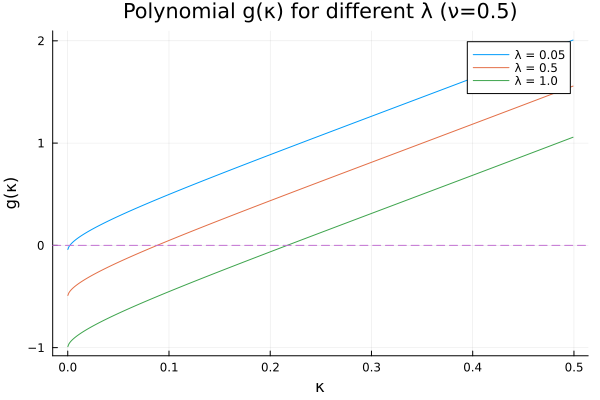

In [67]:
g(κ, λ, ν) = κ^(2-ν) + 2κ + κ^ν + 2λ*(ν-1)

plot(title="Polynomial g(κ) for different λ (ν=$(ν))",xlabel="κ", ylabel="g(κ)",legend=:topright)

for λ in lambdas
    plot!(θ_grid, g.(θ_grid, λ, ν), label="λ = $λ")
end

hline!([0], linestyle=:dash, label="")

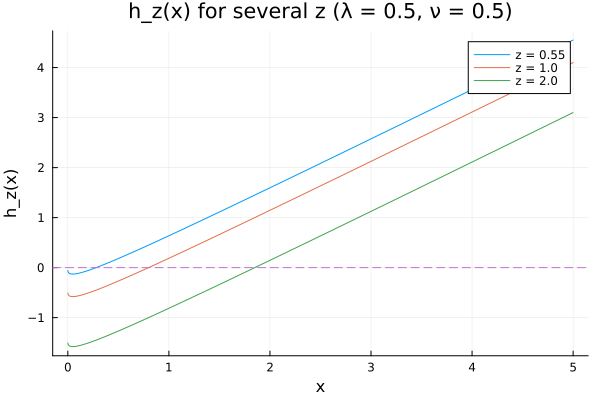

In [68]:
λ  = 0.5   

z_vals = [1.1, 2.0, 4.0] .* γ*λ

x_grid = 1e-4:0.001:5.0

h_z(x, z, γ, λ, ν) = x + γ*λ*(1 + ν*x^(1-ν)) / (1 + x^(1-ν))^2 - z

plot(title = "h_z(x) for several z (λ = $λ, ν = $ν)",
     xlabel = "x", ylabel = "h_z(x)", legend = :topright)

for z in z_vals
    plot!(x_grid, h_z.(x_grid, z, γ, λ, ν),
          label = "z = $(round(z, digits = 3))")
end
hline!([0], linestyle = :dash, label = "")

### Dichotomie

We need a continuous function $f$ on $[a,b]$ with $f(a)f(b)<0$  
Linear convergence, error after $n$ steps is $(b-a)/2^{n}$.


In [69]:
function bisection(f, a, b; tol=1e-10, maxiter=1000)
    fa, fb = f(a), f(b)
    @assert fa < 0 && fb > 0 "Need f(a)<0<f(b)"
    for k in 1:maxiter
        m  = 0.5*(a+b)
        fm = f(m)
        if abs(fm) <= tol || 0.5*(b-a) <= tol
            return m, k
        elseif fm>0
            b, fb = m, fm
        else
            a, fa = m, fm
        end
    end
    error("No convergence in $maxiter iterations")
end

bisection (generic function with 1 method)

### Newton

We need $f$ differentiable and $f'$ never 0 on an interval containing the root with an initial guess $x_0$ sufficiently close to the solutiopn with a good landscape.   
We have quadratic convergence.

$$
  x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}
$$

In [70]:
function newton(f, fp, x0; tol=1e-10, maxiter=100)
    x = x0
    for k in 1:maxiter
        dfx = fp(x)
        @assert dfx != 0 "Derivative vanished"
        xnew = x - f(x)/dfx
        if abs(xnew - x) <= tol
            return xnew, k
        end
        x = xnew
    end
    error("No convergence in $maxiter iterations")
end

newton (generic function with 1 method)

### Test

In [71]:
using Printf

In [72]:
γ  = 1.0
ν  = 0.5
λ  = 0.5

z  = 1.5 * γ * λ
tol = 1e-10

1.0e-10

In [73]:
g(κ)  = κ^(2-ν) + 2κ + κ^ν + 2λ*(ν - 1)
gp(κ) = (2-ν)*κ^(1-ν) + 2 + ν*κ^(ν-1)

aκ, bκ = 0.0, max(1.0, 2λ*(1-ν))
while g(bκ) ≤ 0                 # enlarge until sign change
    bκ *= 2
end
κ_bis, it_bis_g = bisection(g, aκ, bκ; tol = tol)
κ_new, it_new_g = newton(g, gp, (aκ + bκ)/2; tol = tol)

@printf("(bisection) = %.12f  in %d iters\n", κ_bis, it_bis_g)
@printf("(Newton)    = %.12f  in %d iters\n", κ_new, it_new_g)
@assert abs(κ_bis - κ_new) ≤ tol

(bisection) = 0.088301990356  in 34 iters
(Newton)    = 0.088301990352  in 4 iters


In [74]:
f_z(x)  = x + γ*λ*(1 + ν*x^(1-ν))/ (1 + x^(1-ν))^2 - z
fp_z(x) = 1 + γ*λ*(1-ν)*ν * (1 - x^(1-ν)) / (x^ν * (1 + x^(1-ν))^3)

xL, xR = κ_bis, z             # bracket [κ , z]
x_bis, it_bis_f = bisection(f_z, xL, xR; tol = tol)
x_new, it_new_f = newton(f_z, fp_z, z; tol = tol)

@printf("\n(bisection) = %.12f  in %d iters\n", x_bis, it_bis_f)
@printf("(Newton)    = %.12f  in %d iters\n", x_new, it_new_f)
@assert abs(x_bis - x_new) ≤ tol


(bisection) = 0.520399272117  in 29 iters
(Newton)    = 0.520399272136  in 12 iters


<!-- 
To be sure, this is a variational table associated to our analysis,
if $|z|\leq \lambda \gamma$,

|   x                 |   0   |     ]0,+∞[      |   +∞   |
|---------------------|-------|-----------------|--------|
|  $H_z'$    |   +   |        +        |   +    |
| $H_z$    |    0   |       ↗︎        |     +∞   |



 if $|z|> \lambda \gamma$
|  x                       |     0      |   ]0, κ[     |      κ      |  ]κ, +∞[     |  +∞       |
|--------------------------|-----------|--------------|-------------|--------------|-----------|
|  $H_z'$        |    −      |      −       |     0       |      +       |    +      |
|  $H_z$        |     0      |    ↘︎        |         |     ↗︎       |    +$\infty$       |

$$H_z'(0)=\dfrac{0-z}{\gamma}+\lambda\rho\nu'(0)= -\frac{z}{\gamma}+\lambda<0$$
$$\lim_{x\to+\infty}H_z'(x)=\lim_{x\to+\infty} \frac{x}{\gamma}+ o(1) = \infty > 0$$ -->


## QUT-Compatibility

<span style="color:red"><b>TODO :</b></span> Trouver la statistique

# HarderLASSO SR-LASSO

<span style="color:red"><b>TODO :</b></span> Statisitique  
<span style="color:red"><b>TODO :</b></span> ISTA warm start sur grid heuristique  
<span style="color:red"><b>TODO :</b></span> Plot  

